## Case study:
   ◤ Analysis on Corona-Tweets ◢



## problem statement:
    1★  Try to convert your csv files into DataFrame with both Features and labels
    2★  Apply Text preprocessing on given Dataset
    3★  Apply Bag of Words and TF-IDF
    

## the variables (columns) according to my problem statement are :
    ➊ Tweet Dates
    ➋ Location
    ➌ Original Tweet
    ➍ Tweet Sentiment 
    ➎ User Name
    ➏ Screen Name
    [A screen name is the name that users choose to identify themselves on a network. ]

## Importing libraries ➥

In [1]:
import numpy as np
import pandas as pd
import  os
import time
from datetime import datetime
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer,WordNetLemmatizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sys import getsizeof
import re
from textblob import TextBlob
import emoji
from textblob import TextBlob
from translate import Translator
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim


## Converting CSV File into DataFrame

In [2]:
corona=pd.read_csv(r"/home/dharani/csv files/Corona_NLP_train_raw.csv",encoding='latin-1')

In [3]:
corona

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


## How many features(Columns) do i have?
  i have 6 Features

## How many observations(rows) do i have?
i have 41157 observations

## EDA on given  data frame ❗

In [4]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
corona.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

so,we have initial observation of total 8590 null values in location feild ☝

but we don’t need to deal with them as we are just going to use two columns i.e. “Sentiment” and “Original Tweet”.

In [6]:
corona["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

The process of computationally identifying and categorizing opinions expressed in a piece of text,

especially in order to determine 

whether the tweet's attitude towards a particular topic is positive, negative, or neutral.


so,more people are given "positive" feedback and very few of them reacted with "Extremely-negitive" feedback

In [7]:
corona["TweetAt"].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020', '1/4/2020',
       '2/4/2020', '3/4/2020', '4/4/2020', '5/4/2020', '6/4/2020',
       '7/4/2020', '8/4/2020', '9/4/2020', '10/4/2020', '11/4/2020',
       '12/4/2020', '13-04-2020', '14-04-2020'], dtype=object)

Here the dates are not in same format ,with help of replace function,overcome this thing,as shown below

In [8]:
corona["TweetAt"]= corona["TweetAt"].replace('/', '-0', regex=True)

In [9]:
corona["TweetAt"].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '1-04-02020', '2-04-02020', '3-04-02020', '4-04-02020',
       '5-04-02020', '6-04-02020', '7-04-02020', '8-04-02020',
       '9-04-02020', '10-04-02020', '11-04-02020', '12-04-02020',
       '13-04-2020', '14-04-2020'], dtype=object)

The 'TweetAT' feature of DataSet is one ,that gives information about the timeperiod of these tweets-data .
 
Following dates are telling us the data we having is collected from 16th of march in 2020  to 14th April 2020,
which is very peak satge of Corona spreed.

In [10]:
len(corona["TweetAt"].unique())

30

so ,now we can see above ,that there are total of 30 unique dates where the reviews belongs to .


In [11]:
corona["Location"].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [12]:
s=[]
for i in range(0,len(corona["Location"])):
    if corona["Location"][i] not in s:
        s.append(corona["Location"][i])
    else:pass
s

['London',
 'UK',
 'Vagabonds',
 nan,
 'Ã\x9cT: 36.319708,-82.363649',
 '35.926541,-78.753267',
 'Austria',
 'Atlanta, GA USA',
 'BHAVNAGAR,GUJRAT',
 'Makati, Manila',
 'Pitt Meadows, BC, Canada ',
 'Horningsea',
 'Chicago, IL',
 'Houston, Texas',
 'Saudi Arabia',
 'Ontario, Canada',
 'North America',
 'Denver, CO',
 'southampton soxx xxx',
 'Global',
 'Downstage centre',
 'Ketchum, Idaho',
 'Everywhere You Are!',
 'New York, NY',
 'Someplace, USA',
 'Markham, Ontario',
 'Virginia, USA',
 'London, England',
 'Sverige',
 'Where The Wild Things Are',
 'Canada',
 'United States',
 'Fort Worth, Texas',
 'Houston',
 'Vancouver, British Columbia',
 'Midrand',
 'Drogheda',
 'Columbia, MO',
 'Arkansas, USA',
 'Washington, DC',
 'Ohio, USA',
 'Ogden, UT',
 'West Midlands, England',
 'Reno, NV',
 'San Clemente',
 'Spokane Valley, WA',
 'Drifter ',
 'Hamilton, Ontario',
 'Dallas, TX',
 'Boston',
 'The European Union',
 'Melissa Schuman is a Liar ??',
 'Canvey Island, Essex, UK',
 'NCSU',
 'Morgan

Here in location Field we have unwanted data and numbers,symbols.so we do data Preprocessing

so all the tweets are from diff countris and some tweets are unwanted waste ,can be cleaned by using lemitizer

## Applying Text preprocessing on given Dataset ✔

In [13]:
corona.sample(100)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
15265,19064,64016,UK,22-03-2020,An original #song about #coronavirus recorded ...,Positive
23405,27204,72156,??,26-03-2020,Shopping for food in Portugal this week a coun...,Extremely Negative
17445,21244,66196,"Macomb, MI",23-03-2020,After Whitmer s order Grocery store in West Bl...,Neutral
26038,29837,74789,"Los Angeles, CA",1-04-02020,IÂm getting so much anxiety knowing I need to...,Negative
35019,38818,83770,"York, Pa.",8-04-02020,York County companies produce and donate hand ...,Positive
...,...,...,...,...,...,...
10666,14465,59417,Turtle Island,20-03-2020,Please thank the heroes on the front lines if ...,Extremely Positive
29267,33066,78018,Los Angeles,5-04-02020,ÂBecause of the fractured federal response to...,Negative
17629,21428,66380,NaN,23-03-2020,This is the size on online food shopping queue...,Neutral
34246,38045,82997,London,8-04-02020,"[ #INFO ] Simon Cole, Director at @SGKInc rece...",Extremely Positive


From this sample Dataset we can see lots of unwanted text,symbols,numbers in both "Original Tweet" feild and "location" feild

while converting the given text into vectors ,it will make garbage with huge dimensions,so to overcome this ,we need to preprocess the data

By using some libraries from NLTK(Natural Language ToolKit),we first remove stop words,conveting text into lower case and then deleting symbols ,numbers

Then  only we need to apply Stemming and Lemmatization,which helps us to achieve the root forms (sometimes called synonyms) of inflected (derived) words.

In [14]:
stp=stopwords.words("english")
stp.remove("not")

In [15]:
"not" in stp

False

In [16]:
"""q=[]
X=[]
for x in corona["Location"]:
    x=str(x).lower()
    x=re.sub("[^a-z,  ]","",str(x))
    matched =False
    for word in word_tokenize(str(x)):
                if word in stp:
                    x = x.replace(word, "")
                    matched=True
                    break
                
    if len(list(str(x).split(" ")))>4:
            x=str(x).replace(str(x),"nan")
    else:    
                    geolocator = Nominatim(user_agent = "geoapiExercises")
                    location = geolocator.geocode(x)
                    x=str(location).split(',')[-1]
    X.append(x)
corona["Location"]=X
"""

'q=[]\nX=[]\nfor x in corona["Location"]:\n    x=str(x).lower()\n    x=re.sub("[^a-z,  ]","",str(x))\n    matched =False\n    for word in word_tokenize(str(x)):\n                if word in stp:\n                    x = x.replace(word, "")\n                    matched=True\n                    break\n                \n    if len(list(str(x).split(" ")))>4:\n            x=str(x).replace(str(x),"nan")\n    else:    \n                    geolocator = Nominatim(user_agent = "geoapiExercises")\n                    location = geolocator.geocode(x)\n                    x=str(location).split(\',\')[-1]\n    X.append(x)\ncorona["Location"]=X\n'

In [17]:
q=[]
X=[]
for x in corona["Location"]:
    x=str(x).lower()
    x=re.sub("[^a-z,  ]","",str(x))
    x=re.sub("https?://\S*|www\S*|xxx","",x)
    matched =False
    for word in word_tokenize(str(x)):
                if word in stp:
                    x = x.replace(word, "")
                    matched=True
                    break  
    if len(list(str(x).split(",")))<3:
                    x=str(x).split(',')[-1] 
                    x=str(x).strip()
                    if len(list(str(x).split(" ")))>=2:
                          x=str(x).split(',')[-1] 
                    else: x=x
                    x=x.capitalize()
                    if len(x)<=3:
                        x=x.upper()
                    elif len(x)>15:
                        x=str(x).replace(str(x),"NAN")
    else:    
             x=str(x).replace(str(x),"NAN")
           
    X.append(x)                            
corona["Location"]=X

In [18]:
corona[corona["Location"]!="NAN"]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,,16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41146,44945,89897,India,14-04-2020,#Gold prices rose to a more than 7-year high t...,Positive
41147,44946,89898,NY,14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,Ohio,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive


this is the dataset with modified  locations .

To deal with 'Original Tweet'::::while  removing  stop words  ,dont  forget  to  remove  'not'  word, which  will  change  meaning  of   sentance/Tweet

In [19]:
l=corona["OriginalTweet"].head(10)
l

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
5    As news of the regionÂs first confirmed COVID...
6    Cashier at grocery store was sharing his insig...
7    Was at the supermarket today. Didn't buy toile...
8    Due to COVID-19 our retail store and classroom...
9    For corona prevention,we should stop to buy th...
Name: OriginalTweet, dtype: object

here ,i have urls,symbols,numbers and unwanted pronouns,removing this by using following code

In [20]:
os=[]
p=[]
for x in corona["OriginalTweet"]:
    wnl=[]
    x=x.lower()
    x=re.sub("https?://\S*|www\S*","",x)
    x=re.sub("[^a-zA-Z,  ]","",str(x))
    for word in word_tokenize(str(x)):
                os.append(word)
                if word in stp:
                    pass
                else: 
                    wnl.append(WordNetLemmatizer().lemmatize(word))
    p.append(" ".join(wnl))

In [21]:
p

['menyrbie philgahan chrisitv',
 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med not order',
 'coronavirus australia woolworth give elderly , disabled dedicated shopping hour amid covid outbreak',
 'food stock not one emptyplease , dont panic , enough food everyone not take need stay calm , stay safecovidfrance covid covid coronavirus confinement confinementotal confinementgeneral',
 ', ready go supermarket covid outbreaknot im paranoid , food stock litteraly empty coronavirus serious thing , please , dont panic cause shortagecoronavirusfrance restezchezvous stayathome confinement',
 'news region first confirmed covid case came sullivan county last week , people flocked area store purchase cleaning supply , hand sanitizer , food , toilet paper good , timdodson report',
 'cashier grocery store sharing insight covid prove credibility commented im civics cla

the "p" contains all the tweets,after preprocessing

In [22]:
corona["OriginalTweet"]=p

In [23]:
corona


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbour family exchange phone nu...,Positive
2,3801,48753,Vagabonds,16-03-2020,"coronavirus australia woolworth give elderly ,...",Positive
3,3802,48754,NAN,16-03-2020,"food stock not one emptyplease , dont panic , ...",Positive
4,3803,48755,NAN,16-03-2020,", ready go supermarket covid outbreaknot im pa...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,New zealand,14-04-2020,airline pilot offering stock supermarket shelf...,Neutral
41153,44952,89904,NAN,14-04-2020,response complaint not provided citing covid r...,Extremely Negative
41154,44953,89905,NAN,14-04-2020,know getting tough kameronwilds rationing toil...,Positive
41155,44954,89906,NAN,14-04-2020,wrong smell hand sanitizer starting turn oncor...,Neutral


《 Data Set after preprocessing 》

## Vectorization-☛                   Applying Bag of Words and TF-IDF ☟

In [24]:
korona=corona.sample(10000)

In [25]:
cv=CountVectorizer()

In [26]:
con_m=cv.fit_transform(korona["OriginalTweet"])

In [27]:
con_m

<10000x24176 sparse matrix of type '<class 'numpy.int64'>'
	with 169880 stored elements in Compressed Sparse Row format>

In [28]:
sorted(cv.vocabulary_)

['aaa',
 'aaaaakubosan',
 'aaannnddd',
 'aabutan',
 'aacounty',
 'aacountygovt',
 'aafp',
 'aaiofficial',
 'aajtak',
 'aalonzowatt',
 'aalto',
 'aaltouniversity',
 'aamaadmi',
 'aaoophth',
 'aapdelhi',
 'aapl',
 'aaron',
 'aaronchown',
 'aarp',
 'aata',
 'aaysharma',
 'ab',
 'abaesq',
 'abandon',
 'abandoned',
 'abangdove',
 'abate',
 'abatement',
 'abattoir',
 'abbey',
 'abbott',
 'abbreviation',
 'abc',
 'abcactionnews',
 'abccanberra',
 'abce',
 'abckimi',
 'abcnews',
 'abcnewsmaybe',
 'abcny',
 'abdbozkurt',
 'abdul',
 'abdulwahab',
 'abeghypocrites',
 'abelmoreno',
 'abeokuta',
 'aberdeen',
 'abetterpharmacy',
 'abhealth',
 'abhigolhar',
 'abhijit',
 'abhimanyu',
 'abhinavits',
 'abhishek',
 'abide',
 'abides',
 'abidsuleri',
 'abiiwastaken',
 'abilene',
 'ability',
 'abiodunborisade',
 'able',
 'ableg',
 'abolishes',
 'abomination',
 'abortion',
 'abortionisessential',
 'abound',
 'aboutbeen',
 'aboutcovidiot',
 'aboutdoctors',
 'abpnews',
 'abq',
 'abramjee',
 'abreast',
 'abrid

In [29]:
pd.DataFrame(con_m.toarray(),columns=sorted(cv.vocabulary_.keys()))

,aaa,aaaaakubosan,aaannnddd,aabutan,aacounty,aacountygovt,aafp,aaiofficial,aajtak,aalonzowatt,...,zoom,zoombombing,zoommeeting,zoomupyourlife,zoonotic,zoopla,zregina,zurfi,zusendung,zweli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
tf=TfidfVectorizer()

In [31]:
cond=tf.fit_transform(korona["OriginalTweet"])

In [32]:
cond.shape

(10000, 24176)

In [33]:
cond.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
pd.DataFrame(cond.toarray(),columns=sorted(tf.vocabulary_.keys()))

,aaa,aaaaakubosan,aaannnddd,aabutan,aacounty,aacountygovt,aafp,aaiofficial,aajtak,aalonzowatt,...,zoom,zoombombing,zoommeeting,zoomupyourlife,zoonotic,zoopla,zregina,zurfi,zusendung,zweli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


we do data processing before text to vector will effect on dimensionalty reduction to get useful data

In [35]:
corona[corona["Location"]!="NAN"]["Location"].value_counts().head(25)

USA               1675
England           1552
CA                1103
India              986
                   984
NY                 712
London             707
United kingdom     664
UK                 642
United states      547
DC                 494
TX                 484
Australia          475
Canada             464
Ontario            356
FL                 345
Nigeria            291
South africa       264
IL                 263
PA                 253
GA                 208
Texas              184
Scotland           180
New york           178
Ireland            176
Name: Location, dtype: int64

In [92]:
corona.replace(to_replace=["Ontario","Alberta","Toronto",'Ontario',"CA"],value="Canada",inplace=True)
corona.replace(to_replace=["Mumbai","New delhi"],value="India",inplace=True)
corona.replace(to_replace=["England","Wales","United kingdom","London"],value="UK",inplace=True)
corona.replace(to_replace=["nan","NAN"," ",""],value=np.nan,inplace=True)
corona["Location"]=corona["Location"].str.replace("Deutschland","Germany")
corona.replace(to_replace=["Victoria","Location","Melbourne","Sydney"],value="Australia",inplace=True)
corona.replace(to_replace=["USAcity", "Texas","New york","United states","California","Los angeles","DC","New york city","Illinois","Chicago","Florida","San francisco","Pennsylvania","Maine","NY"],value="USA",inplace=True)
corona

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,UK,16-03-2020,menyrbie philgahan chrisitv,Neutral
1,3800,48752,NaN,16-03-2020,advice talk neighbour family exchange phone nu...,Positive
2,3801,48753,NaN,16-03-2020,"coronavirus australia woolworth give elderly ,...",Positive
3,3802,48754,NaN,16-03-2020,"food stock not one emptyplease , dont panic , ...",Positive
4,3803,48755,NaN,16-03-2020,", ready go supermarket covid outbreaknot im pa...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,New zealand,14-04-2020,airline pilot offering stock supermarket shelf...,Neutral
41153,44952,89904,NaN,14-04-2020,response complaint not provided citing covid r...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,know getting tough kameronwilds rationing toil...,Positive
41155,44954,89906,NaN,14-04-2020,wrong smell hand sanitizer starting turn oncor...,Neutral


In [93]:
corona[corona["Location"]!="NAN"]["Location"].value_counts().head(40)


USA                1122
UK                  850
Canada              519
India               281
Australia           164
TX                  118
PA                   78
FL                   76
South africa         74
IL                   66
GA                   60
Nigeria              56
Scotland             53
Ireland              46
NC                   38
Kenya                37
VA                   37
NJ                   36
New zealand          35
Pakistan             35
Global               34
Worldwide            34
Germany              33
OH                   33
MI                   33
CO                   31
MD                   30
Earth                28
France               27
MN                   27
TN                   26
AZ                   26
NV                   24
MO                   23
WA                   23
New south wales      22
CT                   20
NYC                  18
Malaysia             17
Ghana                16
Name: Location, dtype: int64

In [94]:
list(corona["Location"].unique())

['UK',
 nan,
 'North america',
 'Idaho',
 'Canada',
 'USA',
 'UT',
 'WA',
 'Australia',
 'TX',
 'KDH',
 'Planet earth',
 'CO',
 'AZ',
 'Rear spot',
 'Nottinghamshire',
 'Nowhere',
 'Blue state',
 'Somewhere windy',
 'Pasos catalans',
 'Malaysia',
 'Maidenhead',
 'South africa',
 'Right behind',
 'Uber away',
 'Peterborough',
 'Italy',
 'Virginia',
 'Pakistan',
 'Your timeline',
 'Global',
 'Hunstanton',
 'Finland',
 'MD',
 'Arkansas usa',
 'MKE',
 'NJ',
 'Ukraine',
 'India',
 'Ghana',
 'Selfquarantine',
 'Oregon',
 'Uganda',
 'SC',
 'Genesis',
 'Hampshire',
 'New zealand',
 'Kuwait',
 'South australia',
 'Berlin',
 'FL',
 'Everywhere',
 'Tawan',
 'DFW',
 'Sri lanka',
 'Montreal',
 'Phlnyc',
 'Karachi',
 'Khobar  riyadh',
 'New england',
 'Tampa florida',
 'Your nerves',
 'Socal',
 'Kcmo',
 'PHL',
 'Next door',
 'Internet',
 'NRA',
 'Sth gippsland',
 'Midmichigan',
 'UAE',
 'Alabama',
 'Catalua',
 'Iraq',
 'Winchester uk',
 'TN',
 'Naboo',
 'Indonesia',
 'Jersey shore',
 'Georgia',
 'He

In [95]:
len(list(corona["Location"].unique()))

1338

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

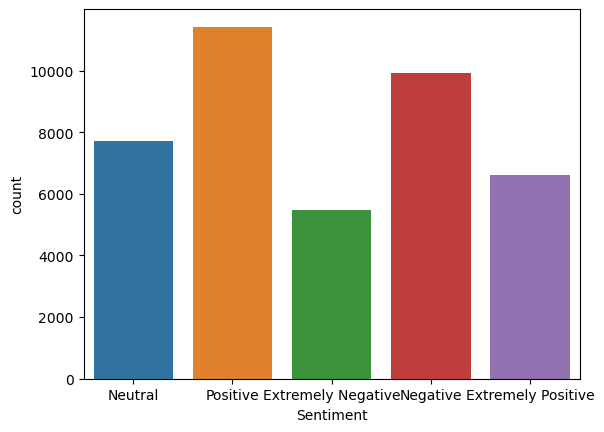

In [74]:

sns.countplot(x ='Sentiment', data = corona)

so,more are of positive sentiments and very less are extremely negitive

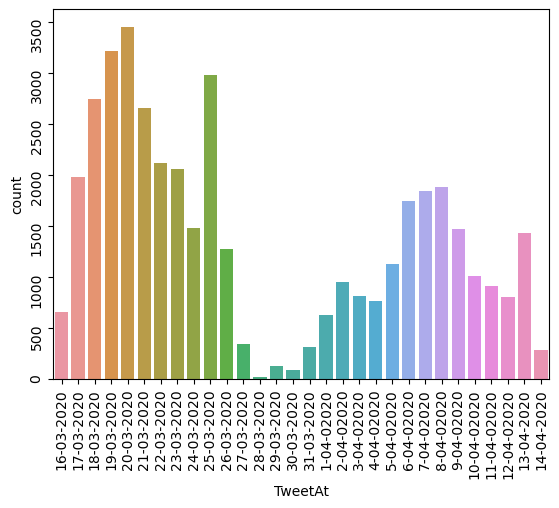

In [132]:
sns.countplot(x ='TweetAt',data =corona)
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')
plt.show()

so, more tweets are on 20th march and few tweets on 28th march

In [127]:
"""s=[]
for i in range(len(corona["Location"])):
    if len(str(corona["Location"][i]))<=3 :
         s.append(corona["Location"][i])
    else:pass
k=set(s)
len(k)
    """
#this is to get country name from cuntry code,need  support from api's#

In [134]:
corona

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,UK,16-03-2020,menyrbie philgahan chrisitv,Neutral
1,3800,48752,NaN,16-03-2020,advice talk neighbour family exchange phone nu...,Positive
2,3801,48753,NaN,16-03-2020,"coronavirus australia woolworth give elderly ,...",Positive
3,3802,48754,NaN,16-03-2020,"food stock not one emptyplease , dont panic , ...",Positive
4,3803,48755,NaN,16-03-2020,", ready go supermarket covid outbreaknot im pa...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,New zealand,14-04-2020,airline pilot offering stock supermarket shelf...,Neutral
41153,44952,89904,NaN,14-04-2020,response complaint not provided citing covid r...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,know getting tough kameronwilds rationing toil...,Positive
41155,44954,89906,NaN,14-04-2020,wrong smell hand sanitizer starting turn oncor...,Neutral
